# Tutorial 5: Classification and clustering

---

### Introduction

In this notebook, we will examine the galaxy data in two different ways:
   1. *Clustering*: Clustering uses unsupervised learning (with unlabeled data) to group together similar images. Note however that the groups may not correspond to the actual classes that we're interested in.
   2. *Classifcation*: classification uses supervised learning (with labeled data) to develop an algorithm for determining the class of new images.
   

We begin with the usual imports.

In [7]:
import numpy as np
import pandas as pd
# For evaluating classification accuracy
from sklearn.metrics import precision_recall_fscore_support

Next let's load the data. Remember that this data has already been preprocessed using the shallow encoder (see Tutorial 2).  For clustering we don't need the labeled data, but we'll need it later for classification.

In [1]:
# Preprocessed input data for train and test
%store -r auto_df_train 
%store -r auto_df_test
# Labels for train and test
%store -r labels_train
%store -r labels_test
# 'classes' contains class names
%store -r classes

---

### Clustering 

We will use `kmeans` for clustering the galaxy images. `kmeans` is a popular unsupervised learning method. Other unsupervised learning methods can be found [here](https://scikit-learn.org/stable/modules/clustering.html).

In [2]:
from sklearn.cluster import KMeans

In [3]:
kmeans = KMeans(init="k-means++", n_clusters=4)
kmeans.fit(auto_df_train)
# 'pred_cluster' is a 1-d array that gives the cluster assigned to each data point (0,1,2, or 3)
pred_cluster = kmeans.predict(auto_df_test)

Now let's see if the clustering agrees with the actual galaxy labels. The function `plot_confusion_matrix` (in the `source` directory) graphically represents the accuracy using a *confusion matrix*. The rows of the confusion matrix correspond to the actual classes, while the columns correspond to the different clusters with their assigned labels.  

In [4]:
from source.clustering import plot_confusion_matrix

The question is, which cluster should correspond to which label?  Initially, we simply assign clusters 1,2,3,4 to labels 1,2,3,4. (This is just a random choice--there's no reason to suppose it's going to be the best assignment).

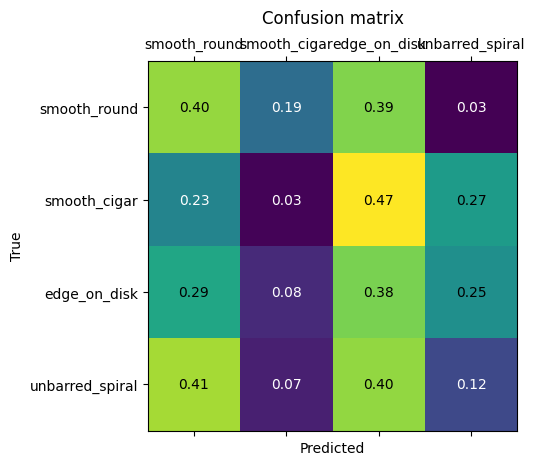

In [5]:
plot_confusion_matrix(pred_cluster, auto_df_test, labels_test, classes)

The confusion matrix shows that clustering does not do a very good job of distinguishing the actual classes. For example, 51\% of unbarred spiral galaxies are located in the cluster that is assigned to 'smooth round'. Also, only 5\% of the actual 'edge_on_disk' galaxies are correctly identified by the cluster assigned by the algorithm.

To get the precision, recall, and f-score  for the above classification, we may use the function from `scikit-learn`:

In [8]:
print(precision_recall_fscore_support(y_pred=pred_cluster, y_true=labels_test, average='weighted'))

(0.20239620785983972, 0.236, 0.20889300832577795, None)


The f-score is only 0.208, Let's try to improve this.  The function `labelMap` (in the `source` directory) finds the assignment of clusters to labels that maximizes accuracy. 

(For another example (using different data) where clusters are optimally assigned to actual labels, see the following [reference](https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/).)

In [9]:
from source.clustering import labelMap, convertLabels

In [10]:
lmap = labelMap(np.array(labels_test), pred_cluster)
print(lmap)
conv_preds_cluster = convertLabels(np.array(lmap), np.array(pred_cluster))
# @@@Try this, then you don't need convertLabels
conv_preds_cluster = lmap[pred_cluster]

[1 2 3 0]


Let's replot the confusion matrix with the new cluster assignment:

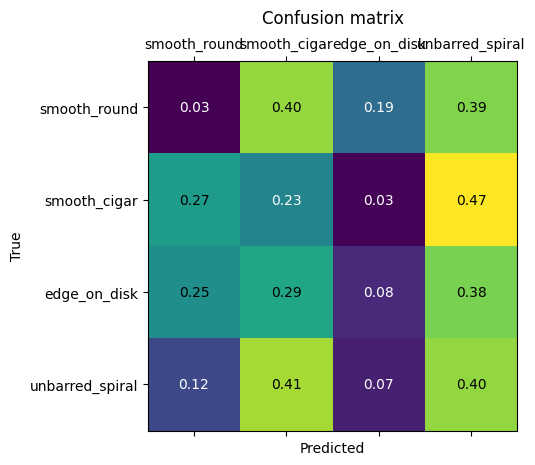

In [11]:
plot_confusion_matrix(conv_preds_cluster, auto_df_test, labels_test, classes)

In [12]:
print(precision_recall_fscore_support(y_pred=conv_preds_cluster, y_true=labels_test, average='weighted'))

(0.16731551009904558, 0.1805, 0.15898798618282456, None)


Even with an optimzed cluster assignment, the f-score is only 0.28. Simple clustering is not sufficient to distinguish between the classes we're interested in.  So let's try supervised learning instead.

---

**Exercise :** from the List we showed [here](https://scikit-learn.org/stable/modules/clustering.html)
choose another clustering method and report the results

---

### Supervised learning

The `scikit-learn`package implements many different  methods for classification using supervised learning. Here we'll try *stochastic gradient descent* (SDG).  You may try others, to see if you can get a better result. They all follow pretty much the same procedure.

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd = SGDClassifier()

sgd.fit(auto_df_train, labels_train)

SGDClassifier()

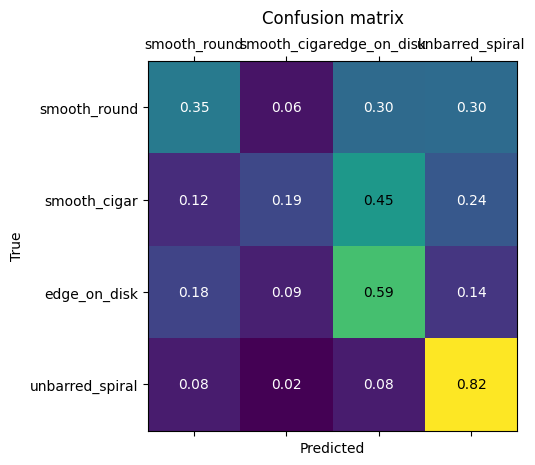

In [15]:
y_predict = sgd.predict(auto_df_test)

plot_confusion_matrix(y_predict, auto_df_test, labels_test, classes)


In [16]:
print(precision_recall_fscore_support(y_pred=y_predict, y_true=labels_test, average='weighted'))

(0.4928800619007409, 0.4835, 0.45326532386657553, None)


We do get slightly better results than the unsupervised learning. But it seems very difficult to distinguish between smooth round, smooth cigar and edge on disk.

**Exercise :** Use Google and try to search other supervise learning tools and try them out, and show the results

---

#### Final task

1- Now the fun starts. How about if we got a totaly new data set and tried some of the tools that we have learned from the past few tutorials. you can go and explore data in health, ... what ever. Our only conidion that it has to be images. Also remmeber the data does not have to be labeled as we already tough you how to do unsupervised learning (clustring). it also has to be around 10,000 for the pipline run in a shorter amount of time, please do approach us if you need some consultation. 

here are some links that we can choose to donwlad a new data sets:
1. https://www.kaggle.com/datasets
2. https://github.com/awesomedata/awesome-public-datasets

In [ ]:
#